<a href="https://colab.research.google.com/github/Jack3690/DDA/blob/main/Week_2/Module_2_1_MaNGA_and_Marvin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


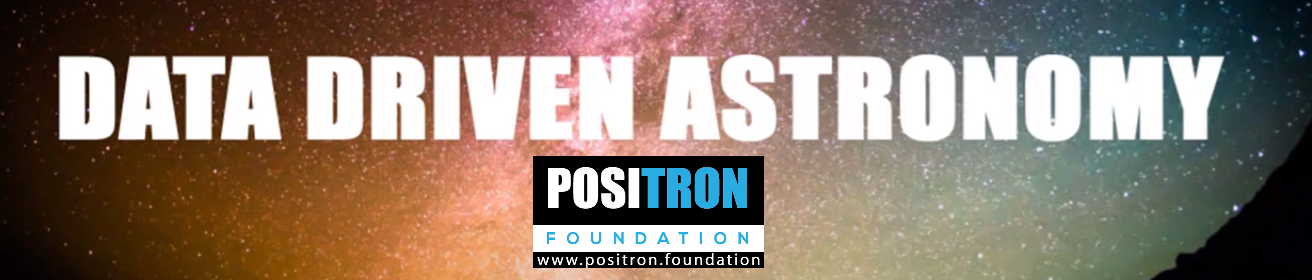




Welcome to **II week** of **Data Driven Astronomy** Online course organized by **Positron Foundation**

This week we will be learning about IFU data. Before we start let's install few pre-requisites.

# **Run the following cells and restart runtime**

In [1]:
!pip install packaging==21 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 908.5 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
statsmodels 0.14.0 requires packaging>=21.3, but you have packaging 21.0 which is incompatible.
xarray 2023.7.0 requires packaging>=21.3, but you have packaging 21.0 which is incompatible.


# **Initialization**

In [1]:
!pip install sdss-marvin --quiet
!pip install Flask==2.1.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.3/284.3 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.2/289.2 kB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.2/351.2 kB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.6/525.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (set

In [2]:
!git clone https://github.com/Jack3690/DDA

Cloning into 'DDA'...
remote: Enumerating objects: 493, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 493 (delta 139), reused 177 (delta 119), pack-reused 271
Receiving objects: 100% (493/493), 57.44 MiB | 11.96 MiB/s, done.
Resolving deltas: 100% (249/249), done.


## **Configuring Marvin**

In [3]:
!cp -a /content/DDA/sas /root/

!mkdir  /root/sas/dr16

In [4]:
!cp -a /content/DDA/sas/map.py /usr/local/lib/python3.10/dist-packages/marvin/utils/plot/

!cp -a /content/DDA/sas/spectrum.py /usr/local/lib/python3.10/dist-packages/marvin/tools/quantities/

!cp -a /root/sas/mangawork/manga/ /root/sas/dr16

In [5]:
cd DDA/Week_2/data

/content/DDA/Week_2/data


# **Imports**

In [6]:
import numpy as np
from matplotlib import pyplot as plt

import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import Planck15
from astropy.io import fits

from marvin import config
import marvin.utils.plot.map as mapplot

# To improve Aesthetics of plots

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

DEBUG:sdss_access:SDSS_ACCESS> Using Tree(sas_base_dir=/root/sas, config=sdsswork, release=WORK)
[WARNING]: cannot initiate Sentry error reporting: [Errno 6] No such device or address. (UserWarning)
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),

[INFO]: No release version set. Setting default to DR17
INFO:marvin:No release version set. Setting default to DR17
[WARNING]: path /root/sas/dr17/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
  warnings.warn('path {0} cannot be found. Setting drpall to None.'

[WARNING]: path /root/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
  warnings.warn('path {0} cannot be found. Setting dapall to None.'

[WARNING]: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _PyDrive2ImportHook.find_spec() not found; falling back

# **MaNGA**

Mapping Nearby Galaxies at APO (MaNGA) (Bundy et al., 2015)
is the newest survey component of the Sloan Digital Sky Survey. Its goal is to map the detailed composition and kinematic structure of ~ 10,000 nearby galaxies. Unlike previous SDSS surveys which obtained spectra only at the centers of target galaxies, MaNGA enables spectral measurements across the face of each of 10,000 nearby galaxies thanks to 17 simultaneous ”integral field units” (IFUs), each composed of tightly-packed arrays of
optical fibers.

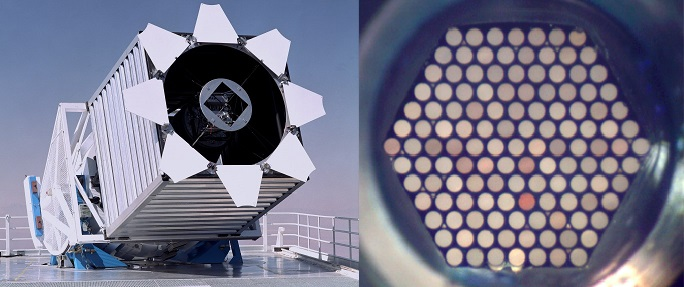

Figure 2.1.1 (Left : SDSS Telescope at APO | Right : IFU Fibers)

The MaNGA instrument utilizes the 2.5 m Sloan Telescope in its spectroscopic mode. In its final form, MaNGA will provide 17 fiber-bundle science IFUs that can be deployed totarget sources anywhere within the 3 degree diameter focal plane. These IFUs feed light into the two dual-channel BOSS spectrographs (Smee et al., 2013), which maintain the same configuration as was used in SDSS-III


**IFU**

IFU spectroscopy is an observing technique that provides spectral information over a 2D field of view using instruments known as IFUs (Integral Field Units). This technique is distinct from previous spectroscopic surveys in SDSS which obtained spectra at only a single point, or longslit spectroscopy which provides some spatial information but only along a single slice through an object. Although IFU spectroscopy provides spatially resolved information, it is distinct from traditional broadband imaging which blends the light over a wide range of wavelengths

# **Marvin**

Marvin (Cherinka and et.al, 2019) is a complete ecosystem designed for overcoming the challenge of searching, accessing, and visualizing the MaNGA data. It consists of three components: a Python package, Application Programming Interface, and a web application utilizing a remote database. Marvin allows users to seamlessly work with MaNGA data by abstracting both remote and local (on-disk) interactions to behind-the-scenes datahandling
functions. Combining this capability with additional processing and querying
tools, users can create powerful Python workflows that are easy to import and share. Let's initiate marvin with SDSS Data Release 15 (DR15)



In [7]:
# set the release to DR15
config.setRelease("DR15")
config.release

[WARNING]: path /root/sas/dr15/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
  warnings.warn('path {0} cannot be found. Setting drpall to None.'

[WARNING]: path /root/sas/dr15/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
  warnings.warn('path {0} cannot be found. Setting dapall to None.'



'DR15'

All Marvin Tools are built off a set of common core functionalities and features, and thus behave in very similar ways. There are four main classes provided in Marvin: the Cube, the RSS, the Maps, and the ModelCube. We will start by focusing on a Marvin Cube to demonstrate the common features and handling of Marvin Tools. Everything discussed here also applies to any of the other available Marvin Tools listed above.

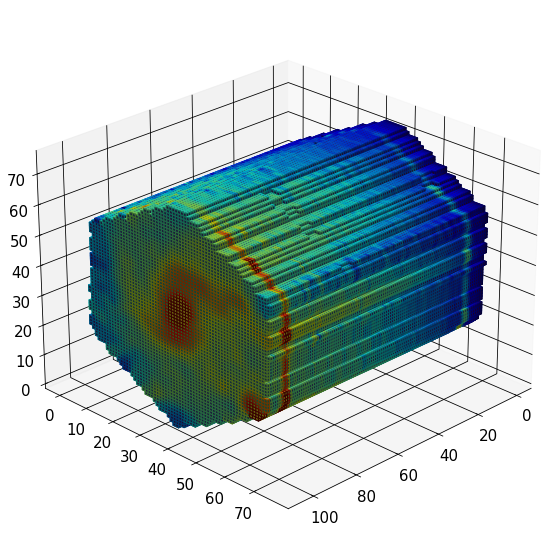

Figure 2.1.2 : Visual representation of a data Cube

#**Cube**

Cube is a class to interact with a fully reduced DRP data cube for a galaxy. [Learn more](https://sdss-marvin.readthedocs.io/en/latest/tools/cube.html)

In [8]:
from marvin.tools.cube import Cube

In [9]:
cube = Cube(plateifu='9883-9102',mode='remote')

Cube is a class to interact with a fully reduced DRP data cube for a galaxy.

PLATEIFU is a unique ID given to a source based on MaNGA observation. MANGAID is N unique ID assigned to a particular galaxy observed as part of MaNGA survey. A galaxy can have more than one PLATEIFU from different observation cycles. But MANGAID is an unique identifier to a galaxy in MaNGA survey.

Let's look at the SDSS image of this source

In [10]:
sdss_cutout = cube.getImage()

[WARNING]: Specified hdu=MANGA not found, reading in first available table (hdu=1) instead. This will result in an error in future versions! (AstropyDeprecationWarning)
  warnings.warn(

DEBUG:marvin:local mode failed. Trying remote now.


[WARNING]: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _PyDrive2ImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _PyDriveImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _OpenCVImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _BokehImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _AltairImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _PyDrive2ImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _PyDriveImportHook.find_spec() not found; falling back to find_module() (ImportWarning)

[WARNING]: _OpenCVImportHook.find_spec() not found; falling back to find_module() (I

<WCSAxes: >

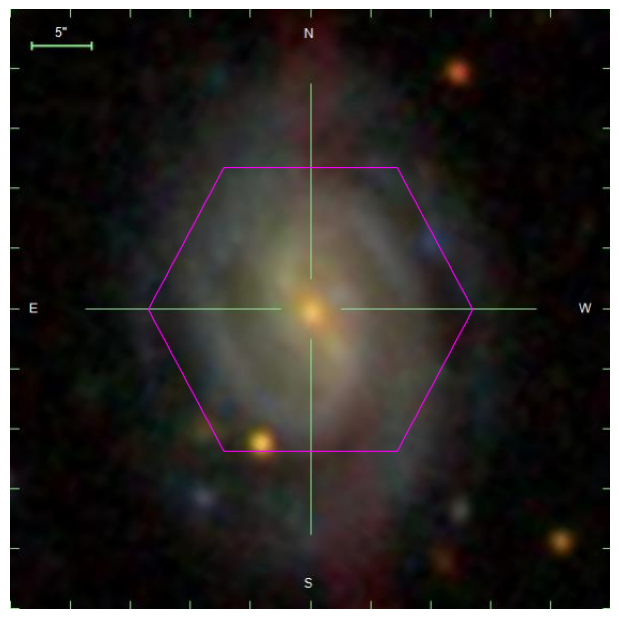

In [11]:
sdss_cutout.plot()

In [12]:
sdss_cutout.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 256.64139  33.692983  
CRPIX : 281.0  281.0  
PC1_1 PC1_2  : -2.47222222222e-05  0.0  
PC2_1 PC2_2  : 0.0  2.47222222222e-05  
CDELT : 1.0  1.0  
NAXIS : 0  0

**Exercise 3.1**

Write code to display sdss_cutout with wcs projection

<WCSAxes: >

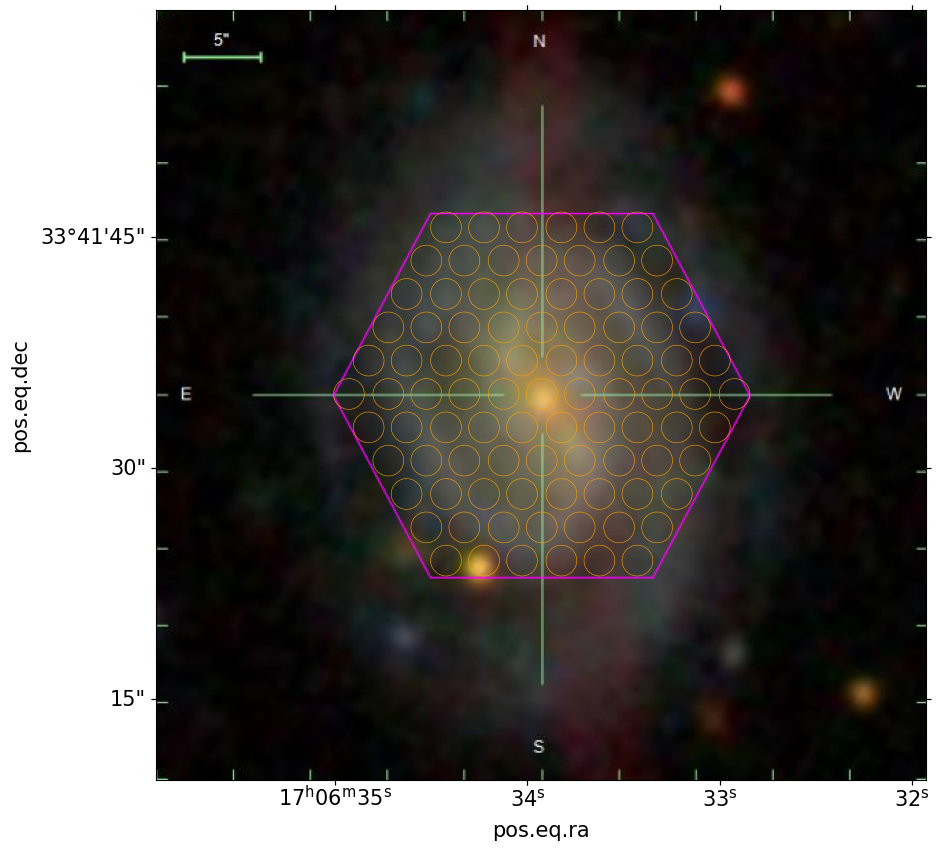

In [13]:
wcs = sdss_cutout.wcs  # wcs object

fig = plt.figure()

# Add subplot with WCS projection. Refer week 1 modules for examples.
ax = fig.add_subplot(projection=wcs)

ax.imshow(sdss_cutout.data)

# Overlaying fibers

sdss_cutout.overlay_fibers(ax=ax)

Let's look at header file of the cube to learn more

In [9]:
cube.header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  = '-32     '           / Number of bits per data pixel                  
NAXIS   = '3       '           / Number of data axes                            
NAXIS1  = '64      '                                                            
NAXIS2  = '64      '                                                            
NAXIS3  = '4563    '                                                            
PCOUNT  = '0       '           / No Group Parameters                            
GCOUNT  = '1       '           / One Data Group                                 
AUTHOR  = 'Brian Cherinka & David Law <bcherin1@jhu.edu, dlaw@stsci.edu>'       
VERSDRP2= 'v2_4_3  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v2_4_3  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v2_52   '           / Platedesign Version                            
VERSFLAT= 'v1_31   '        

In [14]:
print(cube.header['NAXIS1'],cube.header['NAXIS2'],cube.header['NAXIS3'])

64 64 4563


We see that cube has 3 dimensions where 2 dimensions are spacial and 1 dimension is spectral. Let's look at the wcs header for more info

In [15]:
cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE-LOG'  
CRVAL : 256.64139  33.692983  3.62159598486e-07  
CRPIX : 33.0  33.0  1.0  
PC1_1 PC1_2 PC1_3  : -0.000138889  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.000138889  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  8.33903304339e-11  
CDELT : 1.0  1.0  1.0  
NAXIS : 0  0

For getting spectrum of a particular spaxel the function getSpaxel is used. Let's find the spectrum of the central spaxel. getSpaxel function has xyorigin set to center of image by default thus central spaxel will have coordinates (0,0)

In [16]:
cen = cube.getSpaxel(x=0,y=0)
cen

<Marvin Spaxel (plateifu=9883-9102, x=32, y=32; x_cen=0, y_cen=0, loaded=cube)>

Let's plot the flux

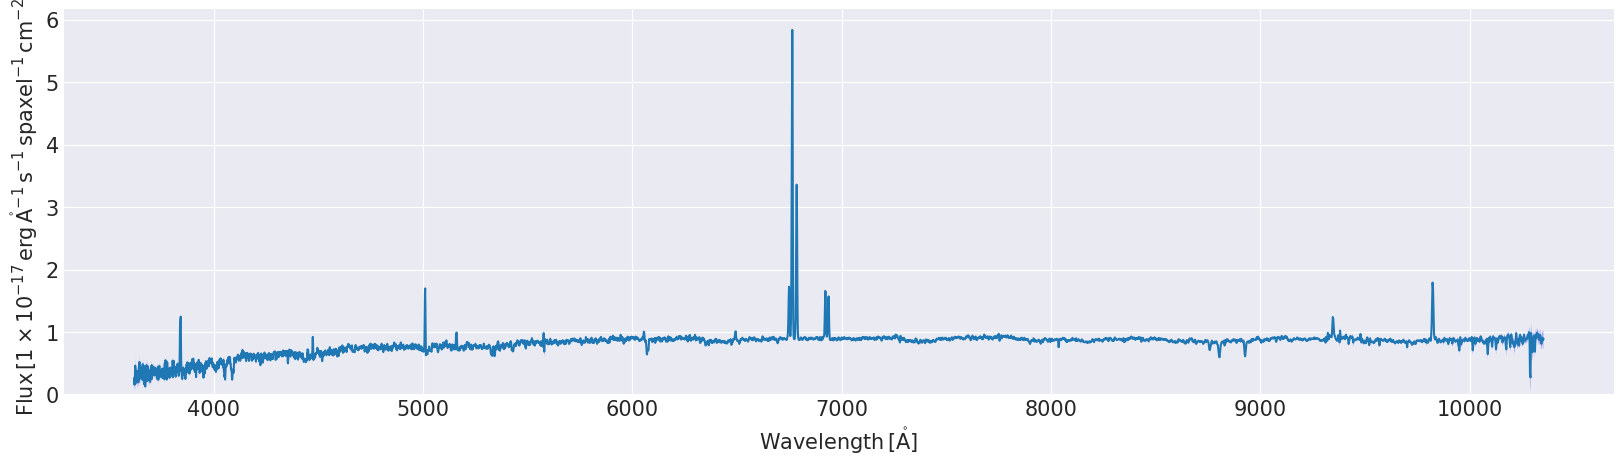

In [17]:
fig = plt.figure(figsize=(20,5))
cen.flux.plot(figure=fig);

In the spectrum we can see absorption lines and emission line. Standard spectroscopic analysis can be done to this data for extracting information

#**Maps**

Maps is a class to interact with the set of DAP maps for a galaxy. They are like snap shots of galaxy at different wavelengths. Apart from emission line maps Marvin has provision for generating a variety of maps such as equivalent width, Stellar velocity, Spectral Indexes like Dn4000 etc. [Learn more](https://sdss-marvin.readthedocs.io/en/latest/tools/maps.html)

In [18]:
maps = cube.getMaps()

DEBUG:marvin:local mode failed. Trying remote now.


In [19]:
maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='2.2.1', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='2.2.1', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='2.2.1', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='2.2.1', unit=''>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='2.2.1', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='2.2.1', unit='1e-17 erg / (s spaxel cm2)'>,
 <Property 'spx_snr', channel='None', release='2.2.1', unit=''>,
 <Property 'binid', channel='binned_spectra', release='2.2.1', unit=''>,
 <Property 'binid', channel='stellar_continua', release='2.2.1', unit=''>,
 <Property 'binid', channel='em_line_moments', release='2.2.1', unit=''>,
 <Property 'binid', channel='em_line_models', release='2.2.1', unit=''>,
 <Property 'binid', channel='spectral_indices', release='2.2.1', unit=''>,
 <Property 'bin_lwskycoo', channel='lum_weighted_on_sky_x', release='2.2.1',

##**H alpha Map**



H-alpha $H_{\alpha}$ is a specific deep-red visible spectral line in the Balmer series with a wavelength of 656.28 nm in air; it occurs when a hydrogen electron falls from its third to second lowest energy level. H-alpha light is the brightest hydrogen line in the visible spectral range. H alpha emission is mostly observed in star forming regions. Star forming regions have yound O-B type stars at temperture of order of 10,000K. The UV photons from such O-B type stars photo-ionize hydrogen atoms in the ISM causing them to emit hydrogen emission lines such as H alpha.

(<Figure size 1000x1000 with 2 Axes>,
 <Axes: title={'center': 'Emission line Gaussian flux: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

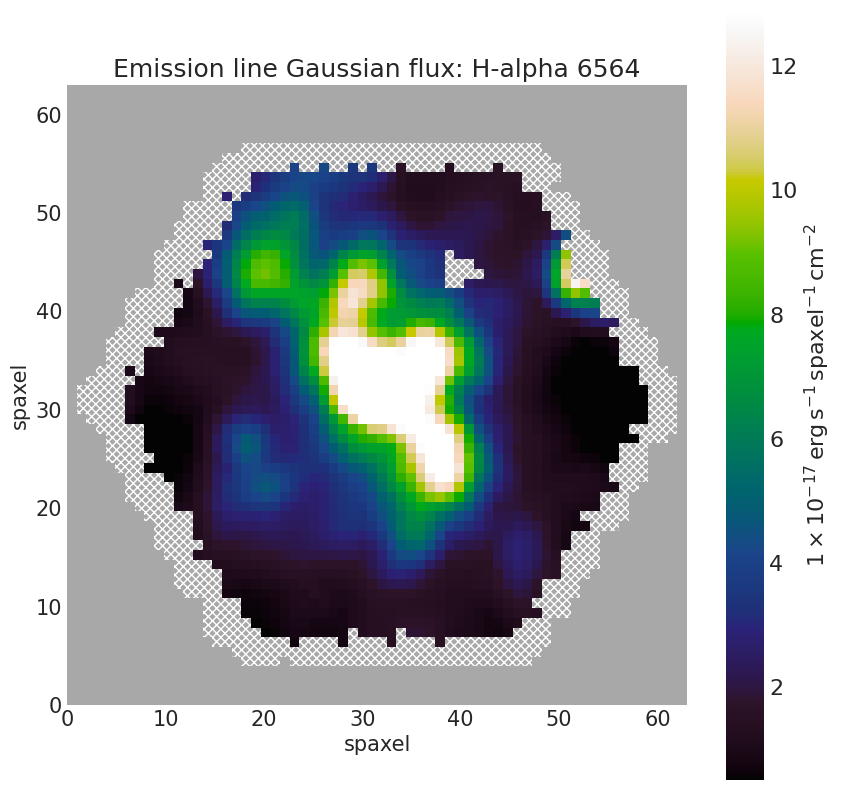

In [20]:
ha = maps['emline_gflux_ha_6564']
ha.plot()

In [21]:
ha.unit

Unit("1e-17 erg / (s spaxel cm2)")

In [22]:
ha.mean()

<Marvin Map (property='emline_gflux_ha_6564')>
1.5092123559570312 1e-17 erg / (s spaxel cm2)

In [23]:
maps.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE-LOG'  
CRVAL : 256.64139  33.692983  3.62159598486e-07  
CRPIX : 33.0  33.0  1.0  
PC1_1 PC1_2 PC1_3  : -0.000138889  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.000138889  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  8.33903304339e-11  
CDELT : 1.0  1.0  1.0  
NAXIS : 0  0

When we look at wcs of maps object we notice that it has 3 dimensions, but we know that images only need 2 dimensions. Thus we need to slice the wcs object to 2 spacial dimensions. Let's look at how to use mapplot.plot function to plot maps with sliced wcs object.

(<Figure size 1000x1000 with 2 Axes>,
 <WCSAxes: title={'center': 'Emission line Gaussian flux: H-alpha 6564'}>)

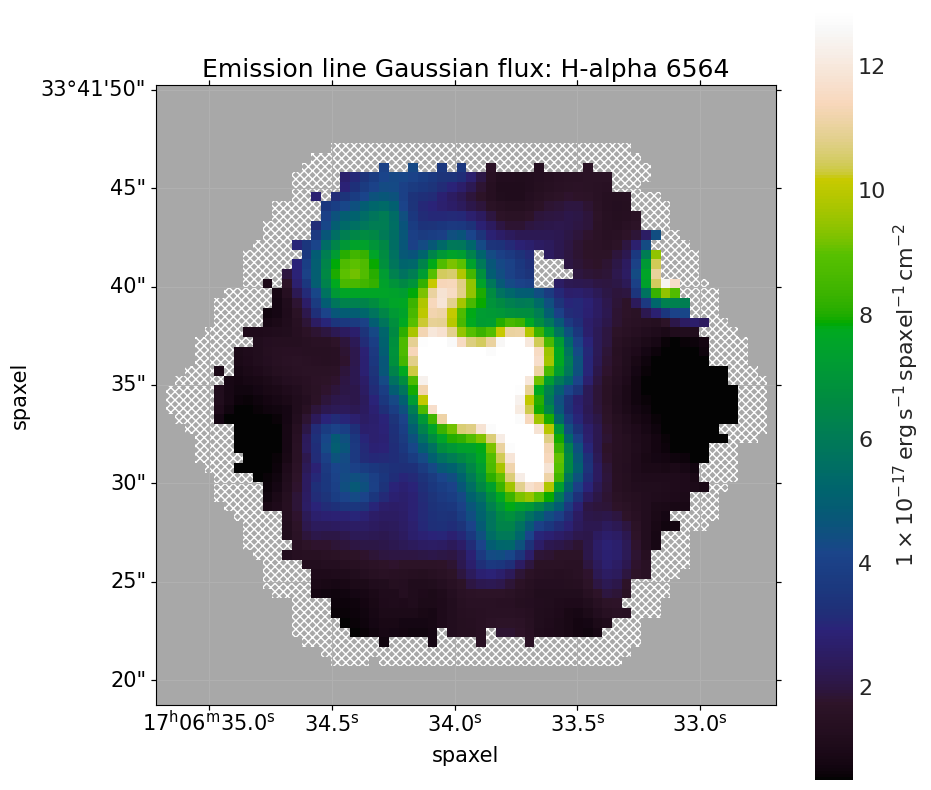

In [24]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = maps.wcs , slices = ['x','y',0])

mapplot.plot(dapmap = ha, ax = ax, fig = fig )

Accessing the maps are fairly simple. Let's learn how to use maps to extract science

**Gas Phase Metallicity**

In the Universe most of the matter is hydrogen or helium, astronomers call all elements
heavier than hydrogen and helium as metals. Metallicity is defined as the abundance of
elements that are heavier than hydrogen and helium in a source. In our sample, we utilized
the [NII]/Ha emission line ratio to measure the gas-phase metallicity, specifically N2
metallicity calibration from Pettini and Pagel (2004) was used

$12+ \log (O/H) = 8.9 + 0.57\times\log\left(N2\right)$


$N2 = \dfrac{F(N[II])}{F(H_{\alpha})}$

**Exercise 3.2**

Evaluate and plot the RHS of the equation above using N[II] (6585) and $H_{\alpha}$ maps and plot the final map using mapplot.plot with wcs projection

In [ ]:
nii =                              #  NII emission line gaussian flux (6585 Angstrom)
ha  =                              #  H alpha  emission line gaussian flux (6564 Angstrom)

n2  =

logn2 =

logoh =                           # 8.9 + 0.57log(F(NII)/F(Ha))

Following code is an example on how to use mapplot and maps.wcs

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = maps.wcs , slices = ['x','y',0])

mapplot.plot(dapmap = logoh ,title = 'Gas Phase Metallicity',ax = ax, fig = fig ,cblabel = '12 +log(OH)')
ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')

**Exercise 3.3**

Star Forming Rate Density (SFRD). In this section objective is to use Marvin maps to estimate SFR and SFRD of MaNGA galaxies.

Follow the steps and complete the missing codes in cells below

Use Maps function to obtain maps for plateifu=7992-9102'

In [ ]:
from marvin.tools.maps import Maps

In [ ]:
maps = Maps(plateifu= )

ha =                               # H alpha flux

hb =                               # H beta ( 4862 Angstrom) flux


ha_hb = ha/hb

# Plot H alpha, H Beta and H_alpha/H_beta

fig,ax = plt.subplots(1,3,figsize=(30,10))

mapplot.plot(dapmap=ha,ax=ax[0],fig=fig)

mapplot.plot(dapmap=hb,ax=ax[1],fig=fig)

mapplot.plot(dapmap=ha_hb,ax=ax[2],fig=fig,title=r'Emission line Gaussian flux : $H_{\alpha}/H_{\beta}$')

In [ ]:
mask,fig,ax = maps.get_bpt()

The BPT diagrams (named after "Baldwin, Phillips & Telervich") are a set of nebular emission line diagrams used to distinguish the ionization mechanism of nebular gas. The most famous version consists of [NII] 6584/$H_{\alpha}$ versus [OIII] 5007/$H_{\beta}$ (the BPT-NII diagram; Fig. 5 of Baldwin et al 1981).

In the above figure blue color is for emission lines signifying star formation

In [ ]:
mask.keys()

In [ ]:
sf =   mask['sf']['global']       # Choose global star forming mask

# Multiply star forming mask with H alpha, H beta and H_alpha/H_beta and Plot them

ha_sf = ha*sf

hb_sf =

ha_hb_sf =

fig,ax = plt.subplots(1,3,figsize=(30,9))






fig.suptitle('With Star Forming Mask',y=0.88)

Now we need to calculate dust corrected H alpha flux for which the formula is

$F_{H_{\alpha},0}=F_{H_{\alpha}}10^{k(H_{\alpha})E(B-V)}$

where  

$F_{H_{\alpha}}$ = ha_sf

$k(H_{\alpha}) = 2.468 $

$E(B-V) = 0.934\ln\left(\dfrac{F(H_{\alpha}/F(H_{\beta}))}{2.86}\right)$ = 0.934.ln(ha_hb_sf/2.86)



Calculate extinction corrected H alpha flux using formula given above

In [ ]:
Fa =                             # Hint: Use only ha_hb_sf.value of map inside log
Fa.plot()

Using astropy.cosmology and redshift data from cube, luminosity distance can be calulated as follows:

In [ ]:
z = maps.dapall['z']

D_L = cosmo.lookback_distance(z)

print(f'Redshift            : {z}\nLuminosity Distance : {D_L.to(u.kpc)}')

Now dust corrected $H_{\alpha}$ lumonosity is given by

$L_{H_{\alpha}}= F_{H_{\alpha},0} 4\pi D_L^2$

Where

$F_{H_{\alpha},0}$  is dust corrected $H_{\alpha}$ flux

$D_L$ is luminosity distance

Write code to calculate dust corrected $H_{\alpha}$ lumonosity

In [ ]:
# Convert D_L to cm
D_L =

# Calculate Luminosity Fa  and D_L
L =

In [ ]:
# Plot luminosity with title 'Dust corrected H alpha Luminosity' and cblabel Fa.unit*D_L.unit**2
L.plot(title='Dust corrected H alpha Luminosity',cblabel=Fa.unit*D_L.unit**2)

Now from [Kennicutt's](https://ui.adsabs.harvard.edu/abs/1998ApJ...498..541K/abstract)

$SFR (M_{\odot} yr^{-1})= 5.5\times10^{-42}\times L_{H_{\alpha}}(erg /s)$

In [ ]:
SFR =
SFR = SFR*1e-17      # 1e-17 is the scaling factor of L

SFR.plot(title='SFR',cblabel=u.solMass/u.year)

Now let's calculate the area of the map


In [ ]:
bin_area =  maps.bin_area
bin_area.plot()

We notice that bin area has unit $arcsec^2$. To convert from angular distance to linear distance we use redshift.

In [ ]:
ang_dist = Planck15.kpc_proper_per_arcmin(z).to(u.kpc/u.arcsec)
ang_dist

Thus linear area = $bin\_area\times ang\_dist^2$

In [ ]:
area =                             # unit here is kpc^2. Unit tranformation is not happening as ang_dist isn't a map object

area.unit*ang_dist.unit**2

**Star formation Rate Density**

SFRD = SFR/area

In [ ]:
# Use area.value
SFRD =

# add wcs projection using maps (Remember to use slices)
fig =
ax =

# Plot SFRD with title 'SFRD'  and cblabel with unit u.solMass/(u.year*u.kpc**2)
# Use Mapplot.plot



ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')

Let's plot SFRD vs R/R_e

In [ ]:
R = maps.spx_ellcoo_elliptical_radius # has units arcsecs
R_e = float(maps.header['reff'])      # has units arcsecs

In [ ]:
x =
y =             # SFRD

plt.figure(figsize=(15,8))
plt.scatter(x.value,y.value)

plt.xlabel(r'$R/R_e$')
plt.ylabel(u.solMass/(u.year*u.kpc**2))
plt.title(r'SFRD vs $R/R_e$')

# **Puzzle IV**



Follow the steps below and complete missing code segments

**I.** Write code to generate H alpha Map and Metallicity map with star forming mask for plateifu = '8131-9102' and plot them with WCS projection. Then create an array which stores the sum of values of the two maps. Remove indefinite values from the array.

In [ ]:
maps = Maps(plateifu = '8131-9102')

# Complete the code

# Get H alpha map

ha =

# Get BPT

mask, fig, ax =

# Get Global starforming mask

sf =

# Apply star forming mask on ha

ha_sf =

# Write code to create Gas Phase metallicity map

nii =                  #  NII emission line gaussian flux (6585 Angstrom)

n2  =

logn2 =

logoh =

# Apply star forming mask to metallicity map

logoh_sf =

# Plot the two maps with title in format 'Plateifu : 8131-9102' . Use fig.suptitle for figure title.

fig , ax = plt.subplots(1,2,figsize=(13,5)) # Add WCS projection

ha_sf.plot(fig=fig,ax=ax[0])

# Complete the code



# Add the values(.value) of the logoh_sf and ha_sf

data_1 =                                  # Map data

# remove indefinte values. Hint : use np.isnan | np.isinf

data_1[np.isnan(data_1)|np.isinf(data_1)] = 0

Open 'puzzle_IV_8131-9102.fits' and retrieve the data

In [ ]:
f =
d1_p =

Subtract map data from puzzle data and plot the difference using plt.imshow

In [ ]:
data_1_diff =


**II.** Write code to generate H alpha Map and Metallicity map without star forming mask for plateifu = '9181-9101' and plot them with WCS projection. Then create an array which stores the sum of values of the two maps.

In [ ]:
maps =
# Get H alpha map


ha =

# Write code to create Gas Phase metallicity map





logoh =

# Plot the ha and logoh maps as subplots with suptitle in format 'Plateifu : 9181-9101' .
# Use fig.suptitle for figure title.


# Add the values of ha and logoh maps

data_2 =            # Map Data

# remove indefinte values. Hint : use np.isnan | np.isinf


Open 'puzzle_IV_9181-9101.fits' and retrieve the data

In [ ]:
f =
d2_p =

Subtract map data from puzzle data and plot the difference using plt.imshow

In [ ]:
data_2_diff =


**III.** Write code to generate H alpha Map and OIII map without star forming mask for plateifu = '8086-9101' and plot them with WCS projection. Then create an array which stores the sum of values of the two maps.

In [ ]:
maps =
# Get H alpha map

ha =

# Get OIII map

oiii =                         #  OIII emission line gaussian flux (4960 Angstrom)

# Plot the oiii and ha maps with title in format 'Plateifu : 8086-9101' . Use fig.suptitle for figure title.




# Add the value of two maps

data_3 =                                   # Map data

# remove indefinte values. Hint : use np.isnan and np.isinf


Open 'puzzle_IV_8086-9101.fits' and retrieve the data

In [ ]:
f =
d3_p =

Subtract map data from puzzle data and plot the difference

In [ ]:
data_3_diff =

**IV.** Write code to generate OIII Map and [NII] map with star forming mask for plateifu = '8551-9102' and plot them with WCS projection. Then create an array which stores the sum of values of the two maps.

In [ ]:
maps =
# Complete the code
# Get OIII map
oiii  =
                                     #  OIII emission line gaussian flux (4960 Angstrom)
# Get BPT
mask, fig, ax =

# Get Global starforming mask

sf =
# Apply star forming mask on oiii

oiii_sf =

# Get [NII] map

nii =                                #  NII emission line gaussian flux (6585 Angstrom)

# Apply star forming mask on nii

nii_sf =


# Plot the two maps with title in format 'Plateifu : 8551-9102' . Use fig.suptitle for figure title.




# Add the values of maos nii_sf and oiii_sf

data_4 =  # Map data

# remove indefinte values. Hint : use np.isnan and np.isinf


Open 'puzzle_IV_8551-9102.fits' and retrieve the data

In [ ]:
f =
d4_p =

Subtract map data from puzzle data and plot the difference

In [ ]:
data_4_diff =

Write code to add all four arrays ( data_1_diff, data_2_diff, data_3_diff, data_4_diff) and plot the resultant array using imshow

In [ ]:
data_sum =


Save data in data_sum as fits image with name 'puzzle_4_solution.fits' for submission and future reference